# Prosper Loan Data - Analysis of Defaults of Loans

### Table Of Contents

* [Introduction](#intro)
* [Exploring the data: categorical information](#explore1)
* [Exploring the data: credit scores](#explore2)
* [Exploring the data: financial information](#explore3)
* [Exploring the data: credit history](#explore4)
* [Exploring the data: loan characteristics](#explore5)

### Introduction <a class="anchor" id="intro"></a>

Here we will do some summary exploaration before working on prediction.

The original data can be found here: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv. A variable dictionary concisely explaining the data can be found here: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing.


In [3]:
#Imports

#Data analysis and math
import math
import datetime
import numpy as np
import pandas as pd
from scipy import stats as st

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 7.5)})


In [4]:
#Input (preserve original data in case we need to refer back to it at any point)
df_historical = pd.read_csv("https://s3.amazonaws.com/elephantscale-public/data/prosper-loan/prosper-loan-data.csv.gz")

df_historical.head()

Term  LoanStatus  BorrowerRate  ProsperRating (numeric)  ProsperScore  \
0    36           1        0.1580                      4.0           6.0   
1    36           1        0.1325                      4.0           6.0   
2    36           0        0.1435                      5.0           4.0   
3    36           0        0.3177                      1.0           5.0   
4    36           1        0.2075                      4.0           6.0   

  ListingCategory BorrowerState EmploymentStatus  EmploymentStatusDuration  \
0         Unknown            CO    Self-employed                       2.0   
1         Unknown       Unknown        Full-time                      19.0   
2            Debt            AL         Employed                       1.0   
3       Household            FL            Other                     121.0   
4         Unknown            MI        Full-time                      36.0   

   IsBorrowerHomeowner  ...  ProsperPaymentsOneMonthPlusLate  \
0                 True  ...                              0.0   
1                False  ...                              0.0   
2                False  ...                              0.0   
3                 True  ...                              0.0   
4                False  ...                              0.0   

   ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  LoanOriginalAmount  \
0                       0.0                          0.0                9425   
1                       0.0                          0.0                1000   
2                       0.0                          0.0                4000   
3                       0.0                          0.0                4000   
4                       0.0                          0.0                3000   

   MonthlyLoanPayment  Recommendations  InvestmentFromFriendsCount  \
0              330.43                0                           0   
1               33.81                0                           0   
2              137.39                0                           0   
3              173.71                0                           0   
4              112.64                0                           0   

   InvestmentFromFriendsAmount  Investors  YearsWithCredit  
0                          0.0        258               13  
1                          0.0         53               14  
2                          0.0          1               18  
3                          0.0         10               15  
4                          0.0         53               11  

[5 rows x 46 columns]

In [15]:
df_historical.columns

Index(['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)',
       'ProsperScore', 'ListingCategory', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScore',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed

In [5]:
sns.countplot(df_historical['LoanStatus'])

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

sns.countplot(df_historical['LoanStatus'])

ax2 = fig.add_subplot(222)
sns.barplot(y=df_historical['LoanStatus']).set_ylim([0,1])

(0, 1)

**=> TODO: Calculate how many loans have loan status 0 (bad) vs 1 (good)

In [ ]:
#TODO: Calculate how many loans have loan status 0 (bad) vs 1 (good)

In [10]:
df_historical['LoanStatus'].value_counts()

1    33530
0    16194
Name: LoanStatus, dtype: int64

So, in the historical data as a whole, 67.43% of loans are completed. 32.57% of loans "defaulted". (During analysis, one should always bear in mind that default as we've defined it includes charge-offs, cancellations, and even any current loans with late payments. It might be more constructive to think of the loans labelled with a 0 as "bad" loans rather than outright "defaults").

Let's take a look at our new historical dataframe and then start exploring variables' relationship with default, starting with some potentially useful categorical information.

In [11]:
df_historical.describe()

Term    LoanStatus  BorrowerRate  ProsperRating (numeric)  \
count  49724.000000  49724.000000  49724.000000             49724.000000   
mean      37.383316      0.674322      0.203470                 3.795129   
std        8.200240      0.468632      0.082468                 1.365905   
min       12.000000      0.000000      0.000000                 1.000000   
25%       36.000000      0.000000      0.136400                 3.000000   
50%       36.000000      1.000000      0.199000                 4.000000   
75%       36.000000      1.000000      0.270000                 4.000000   
max       60.000000      1.000000      0.360000                 7.000000   

       ProsperScore  EmploymentStatusDuration   CreditScore  \
count  49724.000000              49724.000000  49724.000000   
mean       6.098906                 81.636172    682.712171   
std        1.759049                 85.135799     66.713278   
min        1.000000                  0.000000    520.000000   
25%        6.000000                 21.000000    640.000000   
50%        6.000000                 53.000000    680.000000   
75%        7.000000                113.000000    720.000000   
max       11.000000                755.000000    880.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  ...  \
count        49724.000000     49724.000000                49724.000000  ...   
mean             9.586819         8.366242                   25.789578  ...   
std              5.570450         4.980212                   14.263379  ...   
min              0.000000         0.000000                    2.000000  ...   
25%              6.000000         5.000000                   15.000000  ...   
50%              9.000000         8.000000                   24.000000  ...   
75%             13.000000        11.000000                   34.000000  ...   
max             59.000000        51.000000                  136.000000  ...   

       ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  \
count                     49724.000000              49724.000000   
mean                          0.011705               1617.444157   
std                           0.258911               4286.493397   
min                           0.000000                  0.000000   
25%                           0.000000                  0.000000   
50%                           0.000000                  0.000000   
75%                           0.000000                  0.000000   
max                          21.000000              72499.000000   

       ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  \
count                 49724.000000        49724.000000        49724.000000   
mean                    543.321921         6527.303495          232.774829   
std                    1886.611584         5270.558892          186.245160   
min                       0.000000         1000.000000            0.000000   
25%                       0.000000         3000.000000          106.990000   
50%                       0.000000         5000.000000          173.710000   
75%                       0.000000         8500.000000          312.390000   
max                   23033.690000        35000.000000         2251.510000   

       Recommendations  InvestmentFromFriendsCount  \
count     49724.000000                49724.000000   
mean          0.099228                    0.051022   
std           0.476979                    0.344454   
min           0.000000                    0.000000   
25%           0.000000                    0.000000   
50%           0.000000                    0.000000   
75%           0.000000                    0.000000   
max          39.000000                   33.000000   

       InvestmentFromFriendsAmount    Investors  YearsWithCredit  
count                 49724.000000  49724.00000     49724.000000  
mean                     37.083268    109.01818        19.570147  
std                     443.751112    111.4189

### Exploring the data: categorical information <a class="anchor" id="explore1"></a>

In [12]:
data_small = df_historical[df_historical['BorrowerState'] > 'VA']

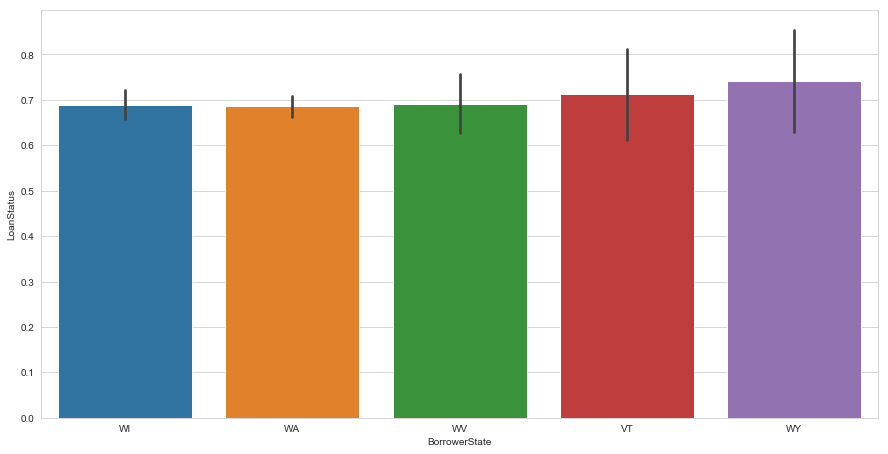

In [13]:
sns.barplot(x="BorrowerState", y="LoanStatus", data=data_small)

**=> TODO: Calculate Loan defualts in Alabama versus DC?

In [28]:
# TODO: Calcualate Loan Defaults in Alabama (AL) vs DC

default = df_historical[df_historical['BorrowerState'].isin (['AL','DC'])]
default.head()

Term  LoanStatus  BorrowerRate  ProsperRating (numeric)  ProsperScore  \
2      36           0        0.1435                      5.0           4.0   
37     36           0        0.3177                      1.0           3.0   
88     36           1        0.2379                      3.0           7.0   
114    36           1        0.2750                      3.0           8.0   
153    36           1        0.2000                      4.0           6.0   

    ListingCategory BorrowerState EmploymentStatus  EmploymentStatusDuration  \
2              Debt            AL         Employed                       1.0   
37             Debt            AL         Employed                      56.0   
88            Other            AL        Full-time                      46.0   
114            Debt            AL         Employed                     158.0   
153           Other            DC        Full-time                      50.0   

     IsBorrowerHomeowner  ...  ProsperPaymentsOneMonthPlusLate  \
2                  False  ...                              0.0   
37                  True  ...                              0.0   
88                 False  ...                              0.0   
114                 True  ...                              0.0   
153                False  ...                              0.0   

     ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  \
2                         0.0                          0.0   
37                        0.0                          0.0   
88                        0.0                          0.0   
114                       0.0                          0.0   
153                       0.0                          0.0   

     LoanOriginalAmount  MonthlyLoanPayment  Recommendations  \
2                  4000              137.39                0   
37                 4000              173.71                0   
88                 3000              117.37                0   
114                7500              308.20                0   
153               15000              557.45                0   

     InvestmentFromFriendsCount  InvestmentFromFriendsAmount  Investors  \
2                             0                          0.0          1   
37                            0                          0.0         25   
88                            0                          0.0         94   
114                           0                          0.0        205   
153                           0                          0.0        568   

     YearsWithCredit  
2                 18  
37                12  
88                 9  
114               15  
153               22  

[5 rows x 46 columns]

In [32]:
default['LoanStatus'][default['LoanStatus']==0].count()

374

Let's take a look at another categorical variable: ListingCategory.


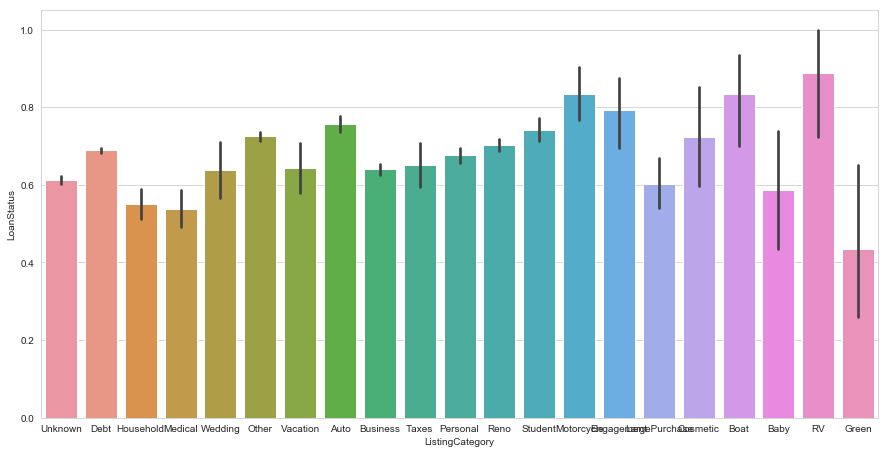

In [14]:
sns.barplot(x="ListingCategory", y="LoanStatus", data=df_historical)

**=> TODO: Calculate default rates of RV Loans ("ListingCategory" == "RV") and "Green" lonas
 

In [40]:
# TODO Calculate defaults for LisingCategory = "RV" and ListingCategory = "GREEN"

# TODO: Calcualate Loan Defaults in Alabama (AL) vs DC

default2 = df_historical[df_historical['ListingCategory'].isin (['RV','GREEN'])]
default2.shape

(18, 46)

In [39]:
default2['LoanStatus'][default2['LoanStatus']==0].count()

2

### Exploring the data: credit scores <a class="anchor" id="explore2"></a>

**=> TODO: Use Seaborn to do bar plots for ProsperScore vs. LoanStatus**
**=> TODO: Use Seaborn to do bar plots for CreditScore vs. LoanStatus**


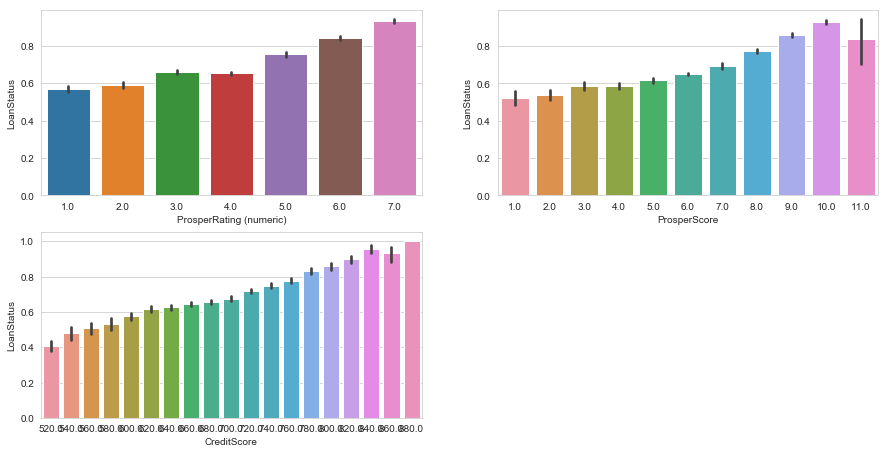

In [41]:

fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.barplot(x="ProsperRating (numeric)", y="LoanStatus", data=df_historical)

ax2 = fig.add_subplot(222)
#TODO: add seaborn barplot for ProsperScore vs LoanStatus
sns.barplot(x="ProsperScore", y="LoanStatus", data=df_historical)


ax3 = fig.add_subplot(223)
sns.barplot(x="CreditScore", y="LoanStatus", data=df_historical)


#TODO: add seabornbarplot for CreditScore vs LoanStatus

Both the Prosper scores and the credit scores seem to be doing a good job of predicting default, with higher ratings defaulting less frequently. Interestingly, the loans with the highest ProsperScores (11) default more frequently than loans rated at a 9 or a 10, and there is a high degree of variance in default rate for those highly rated loans.


Let's visualize some financial variables.

### Exploring the data: financial information <a class="anchor" id="explore3"></a>

In [42]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.barplot(x="EmploymentStatus", y="LoanStatus", data=df_historical)

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="EmploymentStatusDuration", data=df_historical).set_ylim([0,400])

(0, 400)

There doesn't seem to be a relationship between EmploymentStatusDuration and loan default. We'll take a look at the correlation in a moment. EmploymentStatus does, however, seem to have a relationship with default. Interestingly, part-time workers defaulted less often than full-time workers. People who listed their employment status as "Other" defaulted even more often than those who weren't employed at all.

In [43]:
x = df_historical["EmploymentStatusDuration"]
y = df_historical["LoanStatus"]

r, p = st.pearsonr(x, y)

print("The correlation between employment status duration and loan default is {}, with a p-value of {}".format(r, p))

The correlation between employment status duration and loan default is -0.0059057028589972775, with a p-value of 0.1878775422194832


The very weak correlation between employment status duration and loan default, as well as the lack of a statistically significant p-value, lead me to believe that we can safely drop this variable from our dataset.

Let's plot some income metrics and then some indicators of credit availability.

**=> TODO: Do a boxplot of LoanStatus vs DebtToIncomeRatio

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="StatedMonthlyIncome", data=df_historical).set_ylim([0,20000])

ax2 = fig.add_subplot(222)
sns.boxplot(???).set_ylim([0,0.8]) #TODO complete LoanStatus vs DebtToIncomeRatio

Both monthly income and debt : income seem to have a relationship with default. People with higher stated incomes defaulted less often than those with lower incomes, regardless of the size of the loan. And as is intuitive, loans are more likely to default if the ratio of debt to income is higher. 

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="AvailableBankcardCredit", data=df_historical).set_ylim([-1000, 50000])

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="BankcardUtilization", data=df_historical).set_ylim([0,2.5])

We find a similar picture to income, wherein the availability of bankcard credit coincides with completed loans, and the lower the proportion of bankcard utilization, the lower the likelihood of default.

In [ ]:
sns.barplot(x="IsBorrowerHomeowner", y="LoanStatus", data=df_historical).set_ylim([0,1])

It seems homeowners default very slightly less often than renters.

Next let's look at some credit history variables.

### Exploring the data: credit history <a class="anchor" id="explore4"></a>

**=> TODO: Do a boxplot plot in seaborn for LoanStatus vs TotalCreditLinesPast7years**
**=> TODO: Do a boxplot plot in seaborn for LoanStatus vs CurrentDelinquencies**
**=> TODO: Do a boxplot plot in seaborn for LoanStatus vs DelinquenciesLast7Years**

In [ ]:

fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="CurrentCreditLines", data=df_historical).set_ylim([0,40])

ax2 = fig.add_subplot(222)
sns.boxplot(???).set_ylim([0,100])

ax3 = fig.add_subplot(223)
sns.boxplot(???).set_ylim([0,5])

ax4 = fig.add_subplot(224)
sns.boxplot(???).set_ylim([0,20])

Number of credit lines doesn't seem to have a particularly significant relationship with default, but delinquencies do. Among loans that were completed, it is very rare for the debtor to have any current delinquencies. Likewise, a history of delinquency seems to indicate a propensity for default. Let's take a look at those correlations.

In [ ]:
delinquency = ["CurrentDelinquencies", "DelinquenciesLast7Years"]
y = df_historical["LoanStatus"]

for var in delinquency:
    x = df_historical[var]
    r, p = st.pearsonr(x, y)

    print("The correlation between {} and loan default is {}, with a p-value of {}".format(var, r, p))

Both current and historical delinquency correlate significantly (p < 0.05) with loan status. Current delinquencies in particular should be a very strong feature for us.

### Exploring the data: loan characteristics <a class="anchor" id="explore5"></a>

**=> TODO: Do a violin plot in seaborn for LoanStatus vs Term

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.violinplot(x="LoanStatus", y="LoanOriginalAmount", data=df_historical).set_ylim([0,35000])

ax2 = fig.add_subplot(222)
#TODO: violin plot loan status vs term.

The distribution of the loan amount seems to be consistent between both classes. 

In [ ]:
df_historical["Term"].value_counts()

Prosper loans can only have a term of 12, 36, or 60 months. By far the most common is the term of 3 years. Term probably won't be of much use to us to classify our loans either then. Let's wrap up by examining interest rates.

In [ ]:
sns.distplot(df_historical["BorrowerRate"])

In [ ]:
df_historical["BorrowerRate"].describe()

The mean interest rate (without any fees) for all Prosper loans is a fairly substantial 20.35%. From my experience and a quick google, that is roughly equivalent to that of a credit card. The standard deviation is 8.25% however, meaning that the lowest 25% of borrowers are paying a much more reasonable 13.64%, but that the top 25% of borrowers are paying 27.00% and more, before fees!

**=> TODO: Do a boxplot of CreditScore vs BorrowerRate

In [ ]:
sns.boxplot(???) # TODO: Complete

Generally, loans that default have a higher interest rate than loans that are paid completely, even when controlling for credit score. 

Right, so we've had the chance to take a look at some variables and their relationship to default. It seems there are a lot of good potential features available to us, although some of them are categorical and will need some work before we can use them in all of our classifiers.